The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

1. Age: displays the age of the individual.
2. Sex: displays the gender of the individual using the following format : 
  1 = male
  0 = female
3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 
  1 = typical angina 
  2 = atypical angina 
  3 = non — anginal pain
  4 = asymptotic
4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. 
  If fasting blood sugar > 120mg/dl then : 1 (true)  else : 0 (false)
7. Resting ECG : displays resting electrocardiographic results
  0 = normal
  1 = having ST-T wave abnormality
  2 = left ventricular hyperthrophy
8. Max heart rate achieved : displays the max heart rate achieved by an individual.
9. Exercise induced angina : 
  1 = yes
  0 = no
10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.
11. Peak exercise ST segment : 
  1 = upsloping
  2 = flat
  3 = downsloping
12. Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
13. Thal : displays the thalassemia :
  3 = normal
  6 = fixed defect
  7 = reversible defect
14. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 
  0 = absence 
  1, 2, 3, 4 = present.

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib.cm import rainbow

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

In [2]:
%config IPcompleter.use_jedi = False

In [3]:
data = pd.read_csv('heart_disease_dataset.csv')

In [4]:
df = copy.deepcopy(data)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Understanding the data

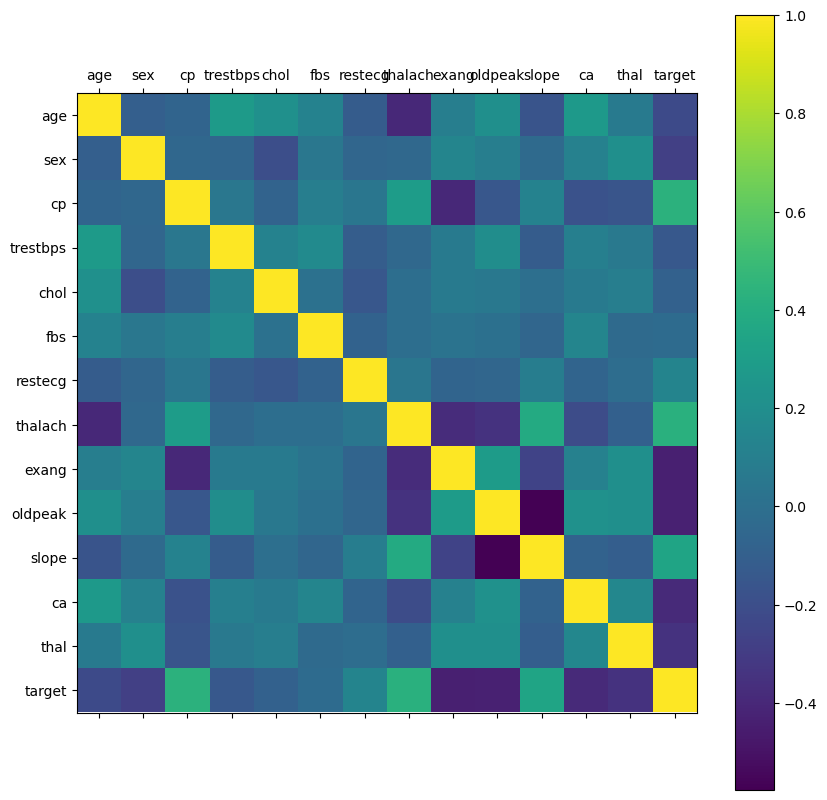

In [12]:
rcParams['figure.figsize'] = 15, 10
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)

plt.colorbar()

<Axes: xlabel='age', ylabel='Count'>

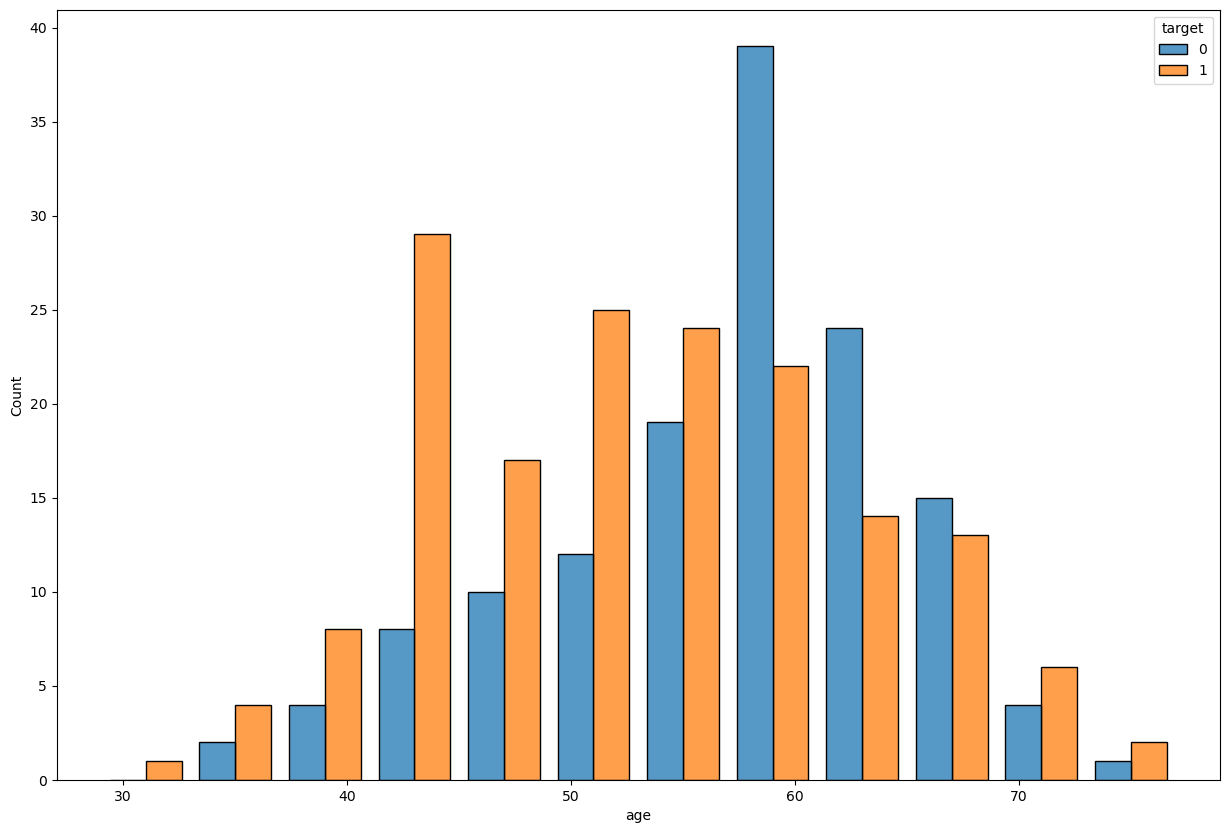

In [13]:
sns.histplot(data = df, x = "age", hue = "target", multiple = "dodge", shrink=.8)

Text(0.5, 1.0, 'Count of each Target Class')

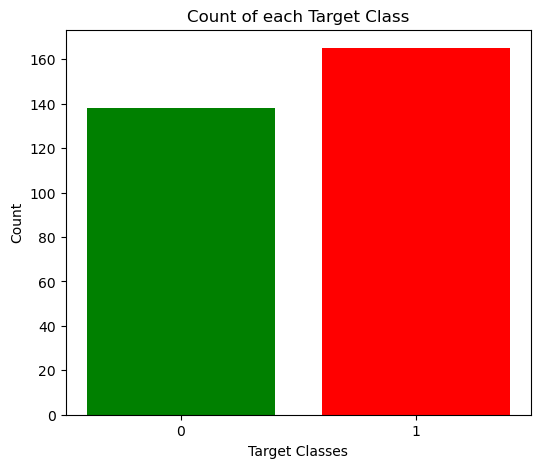

In [14]:
rcParams['figure.figsize'] = 6, 5
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

# Train Test split

In [15]:
X = df.drop("target",axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 test_size = 0.30, random_state = 7)

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

print('\ny_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (212, 13)
X_test shape:  (91, 13)

y_train shape:  (212,)
y_test shape:  (91,)


In [19]:
X_train_numpy = X_train.to_numpy(dtype = np.float32)
y_train_numpy = y_train.to_numpy(dtype = np.float32)
 
X_train_tensor = torch.tensor(X_train_numpy)
y_train_tensor = torch.tensor(y_train_numpy).view(-1, 1)  

X_test_numpy = X_test.to_numpy(dtype = np.float32)
X_test_tensor = torch.tensor(X_test_numpy)

In [20]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset = train_data, batch_size = 64, shuffle = True)

In [21]:
class HeartDiseaseClassifier(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size):
        super(HeartDiseaseClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [22]:
input_size = X_train_tensor.shape[1]
hidden1_size = 6
hidden2_size = 4
model = HeartDiseaseClassifier(input_size, hidden1_size, hidden2_size)

criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).int()

In [23]:
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [24]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%\n")

print ('\nConfusion matrix:')
print(confusion_matrix(y_test, predictions))

print(f"\nClassification report:\n\n {classification_report(y_test, predicted_classes)}")

Accuracy: 74.73%
Precision: 67.69%
Recall: 95.65%
F1 Score: 79.28%


Confusion matrix:
[[30 15]
 [ 5 41]]

Classification report:

               precision    recall  f1-score   support

           0       0.92      0.53      0.68        45
           1       0.68      0.96      0.79        46

    accuracy                           0.75        91
   macro avg       0.80      0.74      0.73        91
weighted avg       0.80      0.75      0.74        91

